In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE, ADASYN
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'column_2C_weka.csv',
 'column_3C_weka.csv',
 'Deploycamp #1_ Contoh ML_ Classification.ipynb',
 'orthopedic_analysis.ipynb']

In [5]:
df = pd.read_csv('column_3C_weka.csv')
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [17]:
df.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [31]:
df['class'].value_counts().sum()

310

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


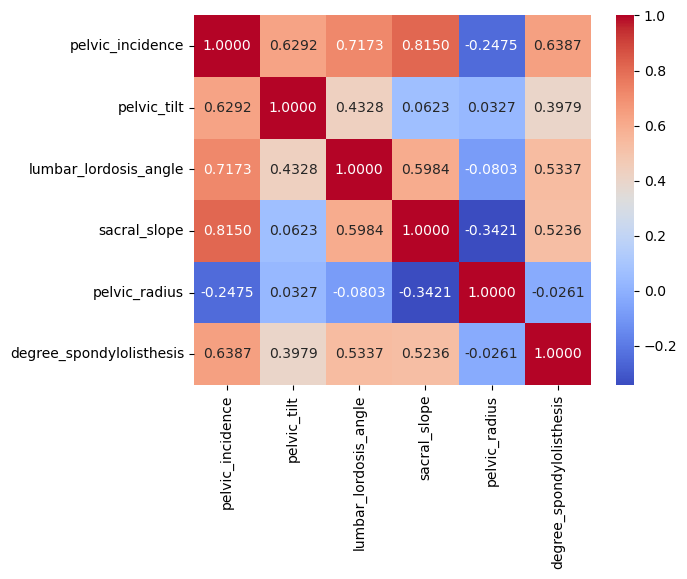

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.4f')
plt.show()

In [7]:
df['class'].value_counts()

class
Spondylolisthesis    150
Normal               100
Hernia                60
Name: count, dtype: int64

In [9]:
X = df.drop(['class'], axis=1)
y = df['class']

In [15]:
X

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [17]:
y

0      Hernia
1      Hernia
2      Hernia
3      Hernia
4      Hernia
        ...  
305    Normal
306    Normal
307    Normal
308    Normal
309    Normal
Name: class, Length: 310, dtype: object

### Because of imbalanced data among the target label, I'll conduct several methods to balance that target label

In [11]:
    # Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)
df_resampled_ros = pd.DataFrame(X_resampled_ros, columns=X.columns)

    # SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
df_resampled_smote = pd.DataFrame(X_resampled_smote, columns=X.columns)

    # Borderline-SMOTE
bsmote = BorderlineSMOTE(random_state=42)
X_resampled_bsmote, y_resampled_bsmote = bsmote.fit_resample(X, y)
df_resampled_bsmote = pd.DataFrame(X_resampled_bsmote, columns=X.columns)

    # ADASYN
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X, y)
df_resampled_adasyn = pd.DataFrame(X_resampled_adasyn, columns=X.columns)


In [13]:
print("Original class distribution:")
print(df['class'].value_counts())

print("\nClass distribution after Random Oversampling:")
print(y_resampled_ros.value_counts())

print("\nClass distribution after SMOTE:")
print(y_resampled_smote.value_counts())

print("\nClass distribution after Borderline-SMOTE:")
print(y_resampled_bsmote.value_counts())

print("\nClass distribution after ADASYN:")
print(y_resampled_adasyn.value_counts())

Original class distribution:
class
Spondylolisthesis    150
Normal               100
Hernia                60
Name: count, dtype: int64

Class distribution after Random Oversampling:
class
Hernia               150
Spondylolisthesis    150
Normal               150
Name: count, dtype: int64

Class distribution after SMOTE:
class
Hernia               150
Spondylolisthesis    150
Normal               150
Name: count, dtype: int64

Class distribution after Borderline-SMOTE:
class
Hernia               150
Spondylolisthesis    150
Normal               150
Name: count, dtype: int64

Class distribution after ADASYN:
class
Hernia               150
Spondylolisthesis    150
Normal               147
Name: count, dtype: int64


### SMOTE method is chosen as df to be processed

In [15]:
df_resampled_smote

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
445,54.340678,8.136821,45.923815,46.203857,112.212952,-2.987183
446,49.833244,16.755755,28.049699,33.077489,121.440572,1.915379
447,74.791749,21.480883,60.498385,53.310865,111.137148,1.785243
448,61.909675,24.055523,47.763481,37.854152,122.398046,0.266859


In [17]:
y_resampled_smote

0      Hernia
1      Hernia
2      Hernia
3      Hernia
4      Hernia
        ...  
445    Normal
446    Normal
447    Normal
448    Normal
449    Normal
Name: class, Length: 450, dtype: object

In [273]:
# Separating features and target
X = df_resampled_smote
y = y_resampled_smote

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Hernia=0, Normal=1, Spondylolisthesis=2

In [197]:
le.classes_

array(['Hernia', 'Normal', 'Spondylolisthesis'], dtype=object)

In [275]:
results = []

def evaluate_model(X, y, scaler, model):
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

    print(f'X_train: {len(X_train)}')
    print(f'X_test: {len(X_test)}')
    print(f'y_train: {len(y_train)}')
    print(f'y_test: {len(y_test)}')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        'modelfit': model.fit(X_train, y_train),
        'model': model.__class__.__name__,
        # 'scaler': scaler.__class__.__name__,
        'scaler': scaler,
        'accuracy': acc,
        'conf_matrix': cm,
        'y_test': y_test,
        'y_pred': y_pred
    })

    print(f"Model: {model.__class__.__name__}, Scaler: {scaler.__class__.__name__}")
    print(f"Akurasi: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print('-' * 60)


In [279]:
scalers = [StandardScaler(), MinMaxScaler()]
models = [RandomForestClassifier(n_estimators=100, random_state=42), SVC(kernel='rbf'),
         XGBClassifier(eval_metric='logloss', random_state=42), LogisticRegression(max_iter=5000),
         KNeighborsClassifier(n_neighbors=6)]

for scaler in scalers:
    for model in models:
        evaluate_model(X, y_encoded, scaler, model)


X_train: 337
X_test: 113
y_train: 337
y_test: 113
Model: RandomForestClassifier, Scaler: StandardScaler
Akurasi: 0.8938
                   precision    recall  f1-score   support

           Hernia       0.87      0.89      0.88        44
           Normal       0.84      0.79      0.81        33
Spondylolisthesis       0.97      1.00      0.99        36

         accuracy                           0.89       113
        macro avg       0.89      0.89      0.89       113
     weighted avg       0.89      0.89      0.89       113

------------------------------------------------------------
X_train: 337
X_test: 113
y_train: 337
y_test: 113
Model: SVC, Scaler: StandardScaler
Akurasi: 0.7965
                   precision    recall  f1-score   support

           Hernia       0.73      0.80      0.76        44
           Normal       0.71      0.61      0.66        33
Spondylolisthesis       0.95      0.97      0.96        36

         accuracy                           0.80       113
     

In [281]:
results_df = pd.DataFrame(results).sort_values(by='accuracy', ascending=False)
results_df

,modelfit,model,scaler,accuracy,conf_matrix,y_test,y_pred
0,"(DecisionTreeClassifier(max_features='sqrt', r...",RandomForestClassifier,StandardScaler(),0.893805,"[[39, 5, 0], [6, 26, 1], [0, 0, 36]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, ..."
7,"XGBClassifier(base_score=None, booster=None, c...",XGBClassifier,MinMaxScaler(),0.893805,"[[40, 4, 0], [6, 26, 1], [0, 1, 35]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, ..."
17,"XGBClassifier(base_score=None, booster=None, c...",XGBClassifier,MinMaxScaler(),0.893805,"[[40, 4, 0], [6, 26, 1], [0, 1, 35]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, ..."
15,"(DecisionTreeClassifier(max_features='sqrt', r...",RandomForestClassifier,MinMaxScaler(),0.893805,"[[39, 5, 0], [6, 26, 1], [0, 0, 36]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, ..."
12,"XGBClassifier(base_score=None, booster=None, c...",XGBClassifier,StandardScaler(),0.893805,"[[40, 4, 0], [6, 26, 1], [0, 1, 35]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, ..."
10,"(DecisionTreeClassifier(max_features='sqrt', r...",RandomForestClassifier,StandardScaler(),0.893805,"[[39, 5, 0], [6, 26, 1], [0, 0, 36]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, ..."
5,"(DecisionTreeClassifier(max_features='sqrt', r...",RandomForestClassifier,MinMaxScaler(),0.893805,"[[39, 5, 0], [6, 26, 1], [0, 0, 36]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, ..."
2,"XGBClassifier(base_score=None, booster=None, c...",XGBClassifier,StandardScaler(),0.893805,"[[40, 4, 0], [6, 26, 1], [0, 1, 35]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, ..."
4,KNeighborsClassifier(n_neighbors=6),KNeighborsClassifier,StandardScaler(),0.849558,"[[42, 1, 1], [11, 21, 1], [1, 2, 33]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, ..."
14,KNeighborsClassifier(n_neighbors=6),KNeighborsClassifier,StandardScaler(),0.849558,"[[42, 1, 1], [11, 21, 1], [1, 2, 33]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, ..."


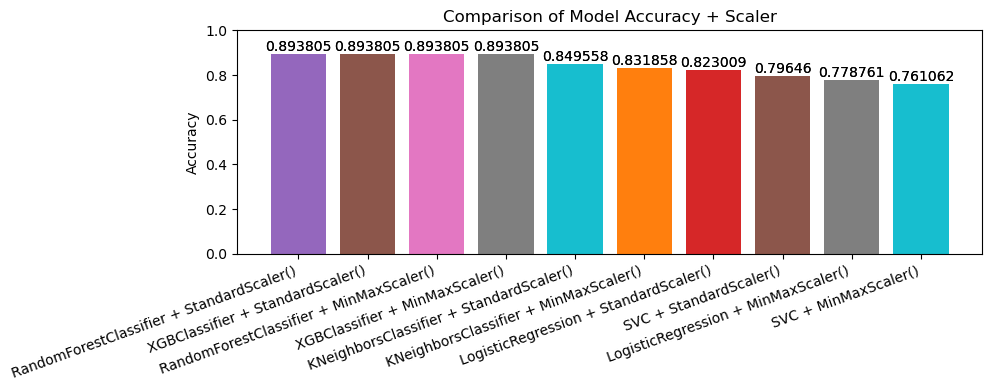

In [283]:
results_sorted = sorted(results, key=lambda x: x['accuracy'], reverse=True)

plt.figure(figsize=(10, 4))
for result in results_sorted:
    label = f"{result['model']} + {result['scaler']}"
    bars = plt.bar(label, result['accuracy'])
    plt.bar_label(bars)

plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracy + Scaler")
plt.xticks(rotation=20, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


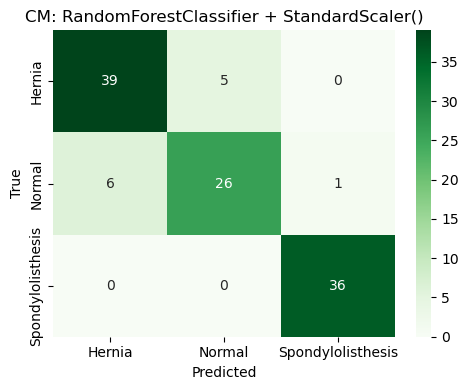

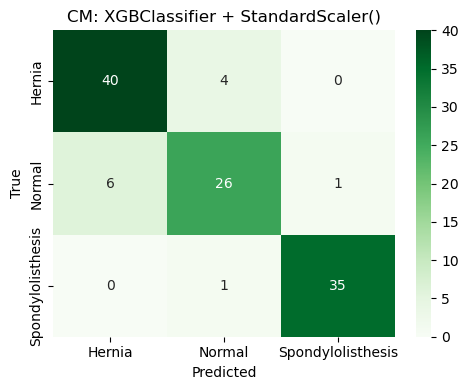

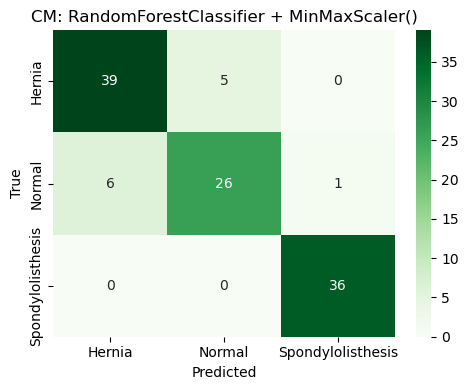

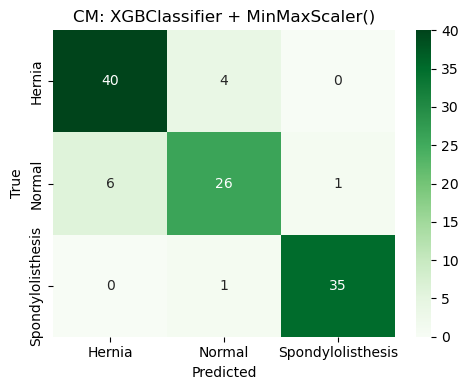

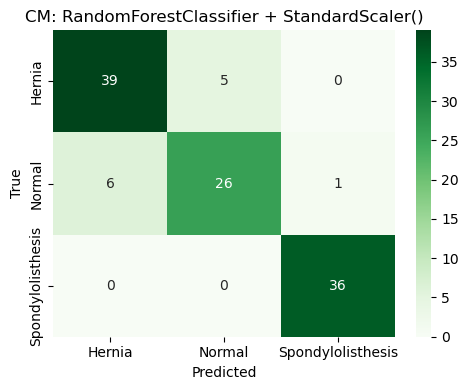

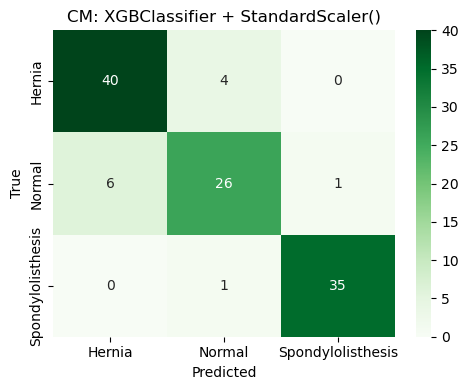

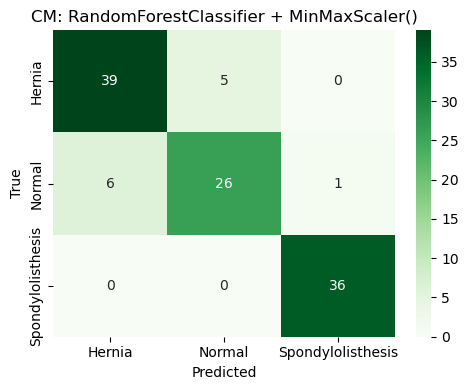

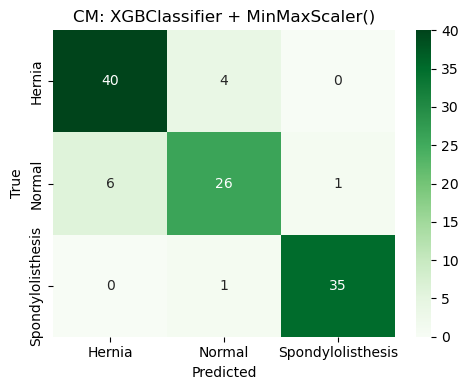

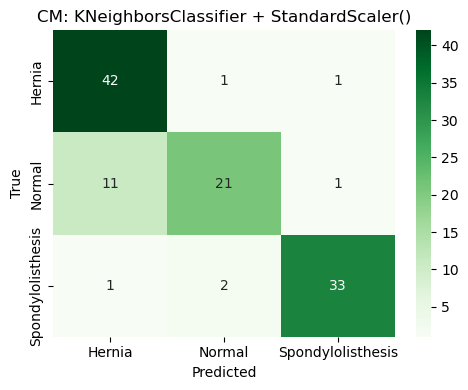

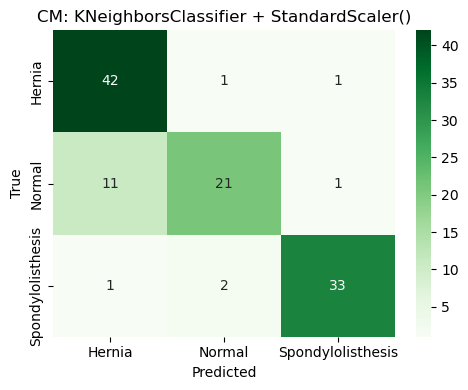

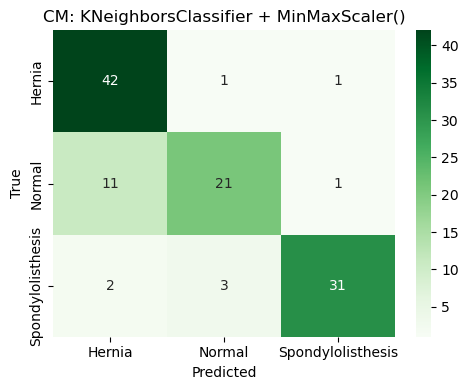

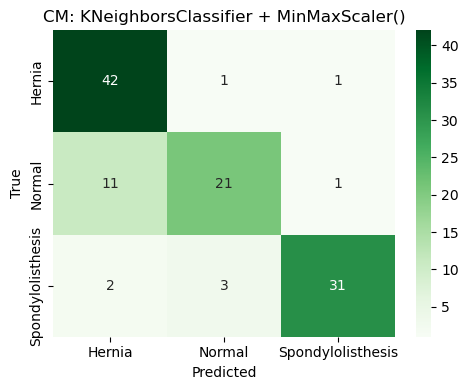

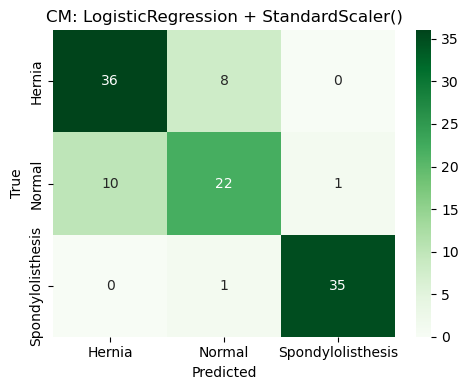

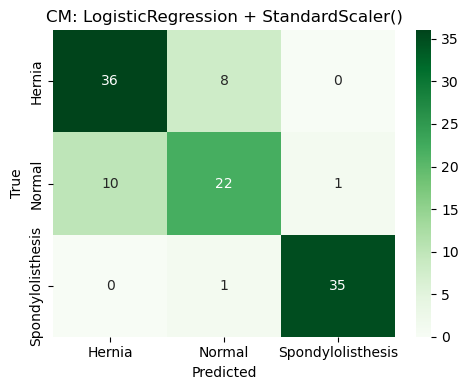

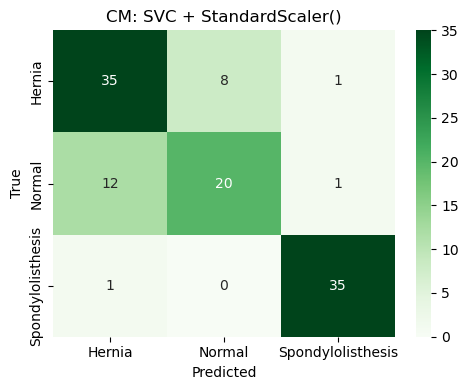

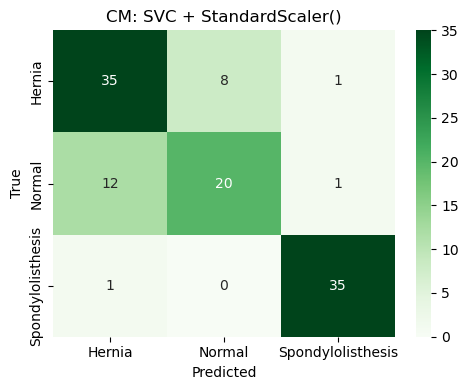

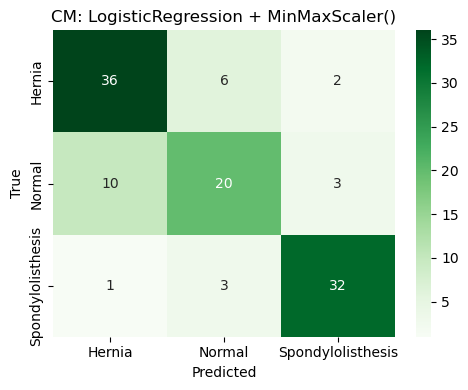

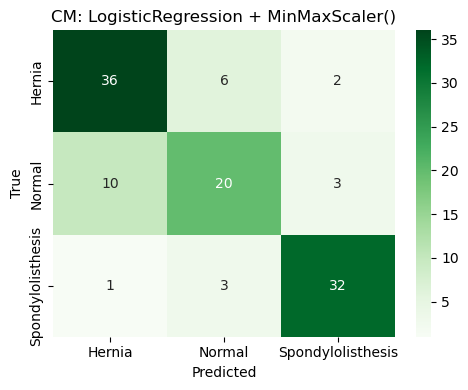

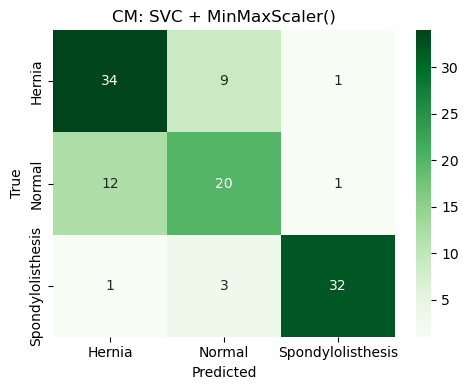

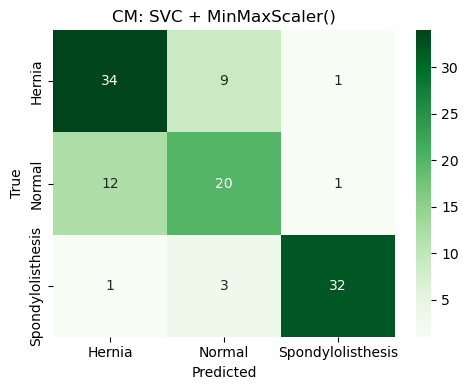

In [364]:
for result in results_sorted:
    plt.figure(figsize=(5, 4))
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', cmap='Greens',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"CM: {result['model']} + {result['scaler']}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


### Save & Choose the Best Model

In [366]:
results_df[:4]

,modelfit,model,scaler,accuracy,conf_matrix,y_test,y_pred
0,"(DecisionTreeClassifier(max_features='sqrt', r...",RandomForestClassifier,StandardScaler(),0.893805,"[[39, 5, 0], [6, 26, 1], [0, 0, 36]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, ..."
7,"XGBClassifier(base_score=None, booster=None, c...",XGBClassifier,MinMaxScaler(),0.893805,"[[40, 4, 0], [6, 26, 1], [0, 1, 35]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, ..."
17,"XGBClassifier(base_score=None, booster=None, c...",XGBClassifier,MinMaxScaler(),0.893805,"[[40, 4, 0], [6, 26, 1], [0, 1, 35]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, ..."
15,"(DecisionTreeClassifier(max_features='sqrt', r...",RandomForestClassifier,MinMaxScaler(),0.893805,"[[39, 5, 0], [6, 26, 1], [0, 0, 36]]","[1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, ...","[1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, ..."


In [293]:
joblib.dump(results_df.scaler[0], 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(results_df.modelfit[0], 'model.pkl')

['model.pkl']

In [346]:
def predict_random_sample(model_path, scaler_path, le_path, df_path, n=1, random_state=42):
    # Load model, scaler, dan label encoder
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    le = joblib.load(le_path)

    # Load data
    df = pd.read_csv(df_path)

    # Check wheather target 'class' exists
    if 'class' in df.columns:
        X = df.drop('class', axis=1)
    else:
        X = df.copy()

    # Get n random sample
    sample = X.sample(n=n, random_state=random_state).reset_index(drop=True)

    # Scaling
    sample_scaled = scaler.transform(sample)

    # Predict
    y_pred_encoded = model.predict(sample_scaled)
    y_pred_labels = le.inverse_transform(y_pred_encoded)

    for i in range(n):
        print(f"\nSampel ke-{i+1}:")
        print(sample.iloc[i])
        print('-' * 35)
        print('* Prediction: ', y_pred_labels[i], ' *')
        print('-' * 35)
    
    return sample, y_pred_labels


In [362]:
sample_data, pred_labels = predict_random_sample(
    model_path='model.pkl',
    scaler_path='scaler.pkl',
    le_path='label_encoder.pkl',
    df_path='column_3C_weka.csv',
    n=15,
    random_state=1
)


Sampel ke-1:
pelvic_incidence             67.412538
pelvic_tilt                  17.442797
lumbar_lordosis_angle        60.144640
sacral_slope                 49.969741
pelvic_radius               111.123970
degree_spondylolisthesis     33.157646
Name: 0, dtype: float64
-----------------------------------
* Prediction:  Spondylolisthesis  *
-----------------------------------

Sampel ke-2:
pelvic_incidence             63.026300
pelvic_tilt                  27.336240
lumbar_lordosis_angle        51.605017
sacral_slope                 35.690060
pelvic_radius               114.506608
degree_spondylolisthesis      7.439870
Name: 1, dtype: float64
-----------------------------------
* Prediction:  Hernia  *
-----------------------------------

Sampel ke-3:
pelvic_incidence             91.468741
pelvic_tilt                  24.508177
lumbar_lordosis_angle        84.620272
sacral_slope                 66.960564
pelvic_radius               117.307897
degree_spondylolisthesis     52.623047
Nam